# Data

In [ ]:
library(here)
source(here("code/setup.R"))
library(latex2exp)


here() starts at /Users/stefan/workspace/work/phd/thesis


Attache Paket: ‘zoo’


Die folgenden Objekte sind maskiert von ‘package:base’:

    as.Date, as.Date.numeric



Attache Paket: ‘reshape2’


Das folgende Objekt ist maskiert ‘package:tidyr’:

    smiths




# RKI data - reporting triangle

We use the reporting triangle for the number of cases, i.e. on any day $t$ the number of cases $$I_{s,t}$$ that are reported associated with date $s < t$. 

We begin our analysis on April 1st 2020, when data have become stable enough to warrant an analysis.

Most delays are less than 4 days, so we consider only those delays, grouping all later delays into a single fifth or larger day.

We perform the same pre-processing as described in chapter 2.3.

In [ ]:
rep_tri <- read_csv(here("data/processed/RKI_4day_rt.csv"))


pdf 
  2

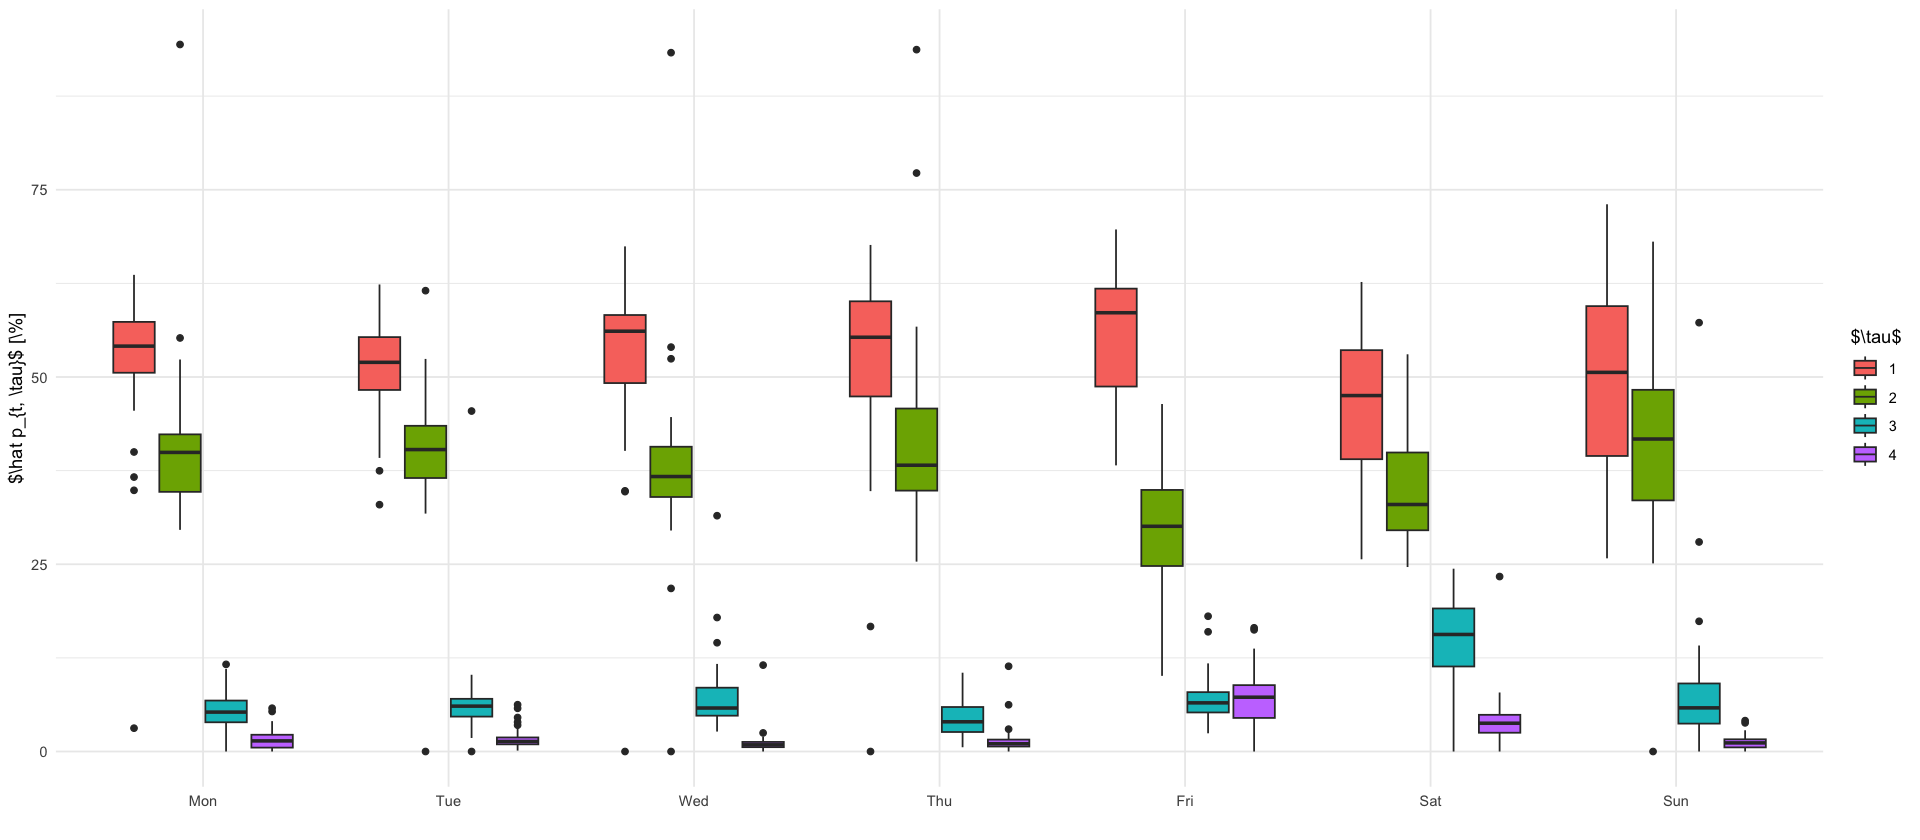

In [ ]:
rep_tri %>%
    pivot_longer(2:5, names_to = "tau", values_to = "i") %>%
    group_by(county_date) %>%
    mutate(p_hat = i / sum(i)) %>%
    ungroup() %>%
    mutate(weekday = wday(county_date, label = TRUE, week_start = 1)) %>%
    filter(year(county_date) == 2020) %>%
    ggplot(aes(x = weekday, y = p_hat * 100, fill = tau)) +
    geom_boxplot() +
    labs(x = "", fill = "$\\tau$", y = "$\\hat p_{t, \\tau}$ [\\%]")

ggsave_tikz(here("tikz/weekday_effect_delays.tex"), height = 3)
